# Clustering Data 
In this notebook, you'll learn how to group individuals into several clusters.

"Clustering" is an (unsupervised) machine learning method which aims at grouping samples from **unlabeled** data into (hopefully) meaningful clusters. Simply put: One cluster's individuals should be similar to each other (e.g. penguins from one species).

**Note:** Clustering and classification might feel similar at first. One simplified explanation is the following. Classification means that you want to know *to which group (which is known beforehand) an individual belongs*. Clustering means that you want to know *which groups exist after all*.

## Goals
- Create an unlabelled dataset that we can cluster
- Try out different kinds of models to cluster our dataset
- Check how well we performed and refine our models


## Unsupervised Learning and Clustering

### Unsupervised Learning

**Starting point**
* No outcome variable, just a set of predictors (features) measured on a set of samples.
* There is no (labelled) training data with a clear link between 𝑋 and y!

**Objective**
* The objective tends to be “more fuzzy”, as there is no clear-cut prediction to make. Instead, we typically want to detect patterns in the data. 
* Examples include:
    * finding groups (clusters) of samples that behave similarly, 
    * find features that behave similarly, 
    * find linear combinations of features with the most variation.
* Note that it is often difficult to estimate how well you’re doing! (You do not have the labelled data to test how good you are!)

**Variants / examples**
* A clustering problem is where you want to discover the inherent groupings in the data (e.g. grouping customers by purchasing behavior).
* An association rule learning problem is where you want to discover patterns that govern your data (e.g. show that people that buy product A also tend to buy product B).


### Clustering

Clustering algorithms try to find groups (clusters) and substructures (with similar properties) within the data. 
Note that what constitutes a „cluster“ is not clearly defined: Appropriate subgroups depend on the data at hand. For the same data set, different algorithms can determine very different clusters!

**Examples for clustering algorithms:**
- k-means clustering: Find clusters that minimize the squared distances within each cluster (NP-hard, therefore solved heuristically). 
- hierarchical (agglomerative) clustering: Incrementally merge the data pairs with the minimum distance measure. 


## Clustering in Practice
Let's dive into an example. As you might have guessed, we'll start off with our imports. Import all necessary libraries (numpy, pandas, seaborn).

In [1]:
# import all necessary standard libraries
import pandas as pd
import numpy as np
import seaborn as sns

# as before we'll ignore any warnings
import warnings 
warnings.filterwarnings("ignore")

Let's take a look at the penguin dataset again. Load it and store it in a variable.

In [2]:
penguins = sns.load_dataset('penguins')

Let's drop any NaN rows.

In [3]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [4]:
penguins.dropna(inplace=True)

### Labelled vs. unlabelled data

The penguins data set is already labelled. We know that there are three species (and their names).
For the sake of this lessons, let's assume that we *do not* know that there are three species!

In [5]:
penguins.drop?

Signature:
penguins.drop(
    labels: 'IndexLabel | None' = None,
    *,
    axis: 'Axis' = 0,
    index: 'IndexLabel | None' = None,
    columns: 'IndexLabel | None' = None,
    level: 'Level | None' = None,
    inplace: 'bool' = False,
    errors: 'IgnoreRaise' = 'raise',
) -> 'DataFrame | None'
Docstring:
Drop specified labels from rows or columns.

Remove rows or columns by specifying label names and corresponding
axis, or by directly specifying index or column names. When using a
multi-index, labels on different levels can be removed by specifying
the level. See the :ref:`user guide <advanced.shown_levels>`
for more information about the now unused levels.

Parameters
----------
labels : single label or list-like
    Index or column labels to drop. A tuple will be used as a single
    label and not treated as a list-like.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Whether to drop labels from the index (0 or 'index') or
    columns (1 or 'columns').
index : single label o

---
### &#x270d; Exercise 

Use the `DataFrame`s drop-method to 'delete' the species-column. Note: you need to specify the *axis* from which to drop the data. Check out the documentation to find out how to do that.

To persist that change, store the modified dataset in a new variable called `X`. *Note: In scikit learn, `X` usually is the input variable and `y` is the (desired) result.*

Therefore, save the species (as ground truth -- we won't use it for the clustering!) in a separate variable called `y`.

Finally, print the top entries of `X` and `y`to ensure that both include the corresponding columns of the initial `penguin` data.

In [6]:
# YOUR CODE HERE
X = penguins.drop(['species'], axis=1)
X

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...
338,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Biscoe,45.2,14.8,212.0,5200.0,Female


In [7]:
y = penguins['species']
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

---

Let's look at the `X` pair plot without the "species" column.

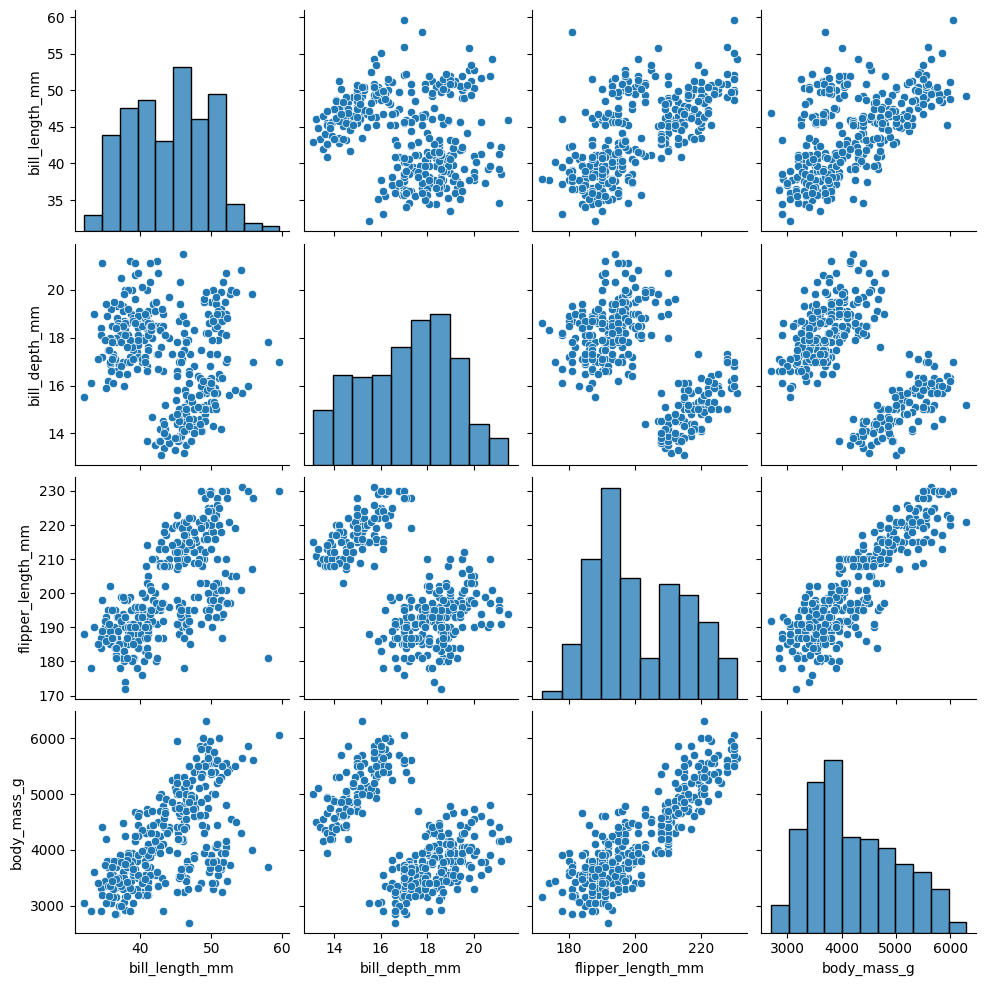

In [8]:
sns.pairplot(X)

Note: When just look at scatter plots with one color, one might think that there are just two species (e.g. bill depth vs. body mass)! This is one of the difficult problems of clustering! You need to *guess* how many clusters there might be and tell the model how many clusters you want!

### Training our first model

Ok, let's try to cluster our `X` dataset. First, we'll need to import a new tool from our toolbox.

In [9]:
from sklearn.cluster import KMeans

Check out the documentation for our clustering method:

In [10]:
KMeans?

Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init='auto',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)
Docstring:     
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

    For an example of how to choose an optimal value for `n_clusters` refer to
    :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to the overall inertia. This technique speeds up             convergence. The algorithm imple

We'll create a model which assumes that we have *3 distinct clusters*. Remember: In real world scenarios this might actually be a difficult task! How do we know how many clusters there are?! Here, we simply assume that we have some prior knowledge (e.g. penguins looking different). In reality, correctly guessing the number of clusters might prove a lot more difficult!

In [11]:
kmeansmodel = KMeans(n_clusters=3)

Now, let's try to fit our model. We just pass our `X` dataset to the fit-method.

In [12]:
kmeansmodel.fit?

Signature: kmeansmodel.fit(X, y=None, sample_weight=None)
Docstring:
Compute k-means clustering.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    Training instances to cluster. It must be noted that the data
    will be converted to C ordering, which will cause a memory
    copy if the given data is not C-contiguous.
    If a sparse matrix is passed, a copy will be made if it's not in
    CSR format.

y : Ignored
    Not used, present here for API consistency by convention.

sample_weight : array-like of shape (n_samples,), default=None
    The weights for each observation in X. If None, all observations
    are assigned equal weight. `sample_weight` is not used during
    initialization if `init` is a callable or a user provided array.

    .. versionadded:: 0.20

Returns
-------
self : object
    Fitted estimator.
File:      c:\users\kglock\desktop\jupyter\2023-10_hector_big_data_methods_final_notebooks\env\lib\site-packages\sklearn\cluster\

In [13]:
kmeansmodel.fit(X)

ValueError: could not convert string to float: 'Torgersen'

Oh no! There was an error!

KMeans doesn't know what to do with the island names. It expects a number, not a string. The same is true for the penguins' sex.

OK, we could replace all string values with an int value to encode their meaning. That's a tedious task -- and as (almost) always, there's a built-in solution to this problem! Check out `pandas`'s `get_dummies` helper function. Note: this is also called *one hot encoding* as only one value is True per row.

In [14]:
pd.get_dummies?

Signature:
pd.get_dummies(
    data,
    prefix=None,
    prefix_sep: 'str | Iterable[str] | dict[str, str]' = '_',
    dummy_na: 'bool' = False,
    columns=None,
    sparse: 'bool' = False,
    drop_first: 'bool' = False,
    dtype: 'NpDtype | None' = None,
) -> 'DataFrame'
Docstring:
Convert categorical variable into dummy/indicator variables.

Each variable is converted in as many 0/1 variables as there are different
values. Columns in the output are each named after a value; if the input is
a DataFrame, the name of the original variable is prepended to the value.

Parameters
----------
data : array-like, Series, or DataFrame
    Data of which to get dummy indicators.
prefix : str, list of str, or dict of str, default None
    String to append DataFrame column names.
    Pass a list with length equal to the number of columns
    when calling get_dummies on a DataFrame. Alternatively, `prefix`
    can be a dictionary mapping column names to prefixes.
prefix_sep : str, default '_'
  

Apply that to our `X` DataFrame and see what happens.

In [15]:
X = pd.get_dummies(X)
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,True,False,False,True,False
340,46.8,14.3,215.0,4850.0,True,False,False,True,False
341,50.4,15.7,222.0,5750.0,True,False,False,False,True
342,45.2,14.8,212.0,5200.0,True,False,False,True,False


Carefully look at our new `DataFrame`. Our initial *island* column has been split into three different columns. Now, the island is encoded in *one hot* form. The same is true for the penguins' sex.

Now, let's try fitting the model again using the encoded version of our DataFrame for the training.

In [16]:
kmeansmodel.fit(X)

KMeans(n_clusters=3)

That worked! Let's predict the labels.

In [17]:
kmeansmodel.predict?

Signature: kmeansmodel.predict(X)
Docstring:
Predict the closest cluster each sample in X belongs to.

In the vector quantization literature, `cluster_centers_` is called
the code book and each value returned by `predict` is the index of
the closest code in the code book.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    New data to predict.

Returns
-------
labels : ndarray of shape (n_samples,)
    Index of the cluster each sample belongs to.
File:      c:\users\kglock\desktop\jupyter\2023-10_hector_big_data_methods_final_notebooks\env\lib\site-packages\sklearn\cluster\_kmeans.py
Type:      method

In [18]:
labels = kmeansmodel.predict(X)
labels

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 1, 2, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1,

We see three different clusters (numbered 0, 1, 2). But how well did it work? Let's look at some plots.

---
### &#x270d; Exercise 

Create three scatterplots.

First, let's do a scatter plot of body mass and bill depth and show the labels by hue.
Then, bill length and depth, also separated by hue.
Lastly, bill depth and body mass.

What do you see? 

<Axes: xlabel='body_mass_g', ylabel='bill_depth_mm'>

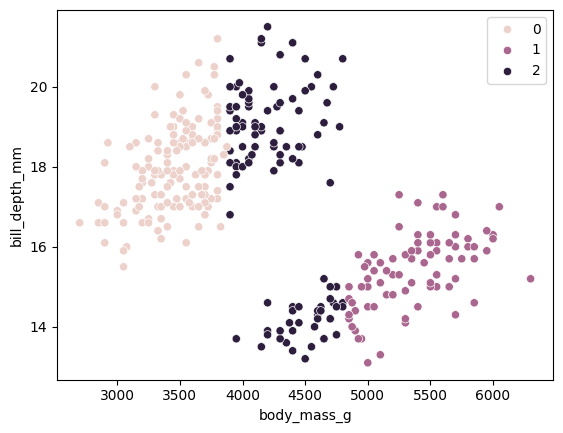

In [19]:
# YOUR CODE HERE
sns.scatterplot(x=X['body_mass_g'], y=X['bill_depth_mm'], hue=labels)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

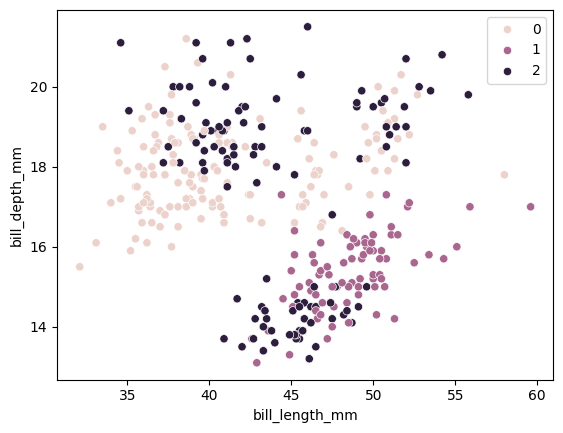

In [20]:
sns.scatterplot(x=X['bill_length_mm'], y=X['bill_depth_mm'], hue=labels)

<Axes: xlabel='bill_depth_mm', ylabel='body_mass_g'>

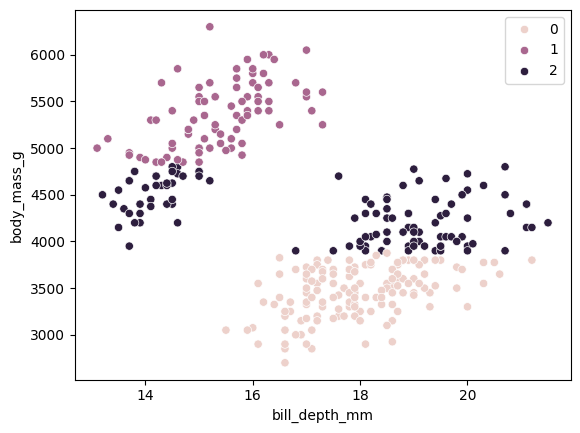

In [21]:
sns.scatterplot(x=X['bill_depth_mm'], y=X['body_mass_g'], hue=labels)

---

That looks ... weird. Maybe, we're missing something? Let's check what went wrong here.

We create a new `DataFrame` and put our labels (what we predicted) and ground truth (what we know is correct) side by side.

In [22]:
check_df = pd.DataFrame({'prediction': labels, 'ground_truth': y})
check_df

,prediction,ground_truth
0,0,Adelie
1,0,Adelie
2,0,Adelie
4,0,Adelie
5,0,Adelie
...,...,...
338,1,Gentoo
340,1,Gentoo
341,1,Gentoo
342,1,Gentoo


Now, let's look at a so called cross tabulation to find out, how well we performed. See https://en.wikipedia.org/wiki/Contingency_table for more info.

In [23]:
pd.crosstab?

Signature:
pd.crosstab(
    index,
    columns,
    values=None,
    rownames=None,
    colnames=None,
    aggfunc=None,
    margins: 'bool' = False,
    margins_name: 'Hashable' = 'All',
    dropna: 'bool' = True,
    normalize: "bool | Literal[0, 1, 'all', 'index', 'columns']" = False,
) -> 'DataFrame'
Docstring:
Compute a simple cross tabulation of two (or more) factors.

By default, computes a frequency table of the factors unless an
array of values and an aggregation function are passed.

Parameters
----------
index : array-like, Series, or list of arrays/Series
    Values to group by in the rows.
columns : array-like, Series, or list of arrays/Series
    Values to group by in the columns.
values : array-like, optional
    Array of values to aggregate according to the factors.
    Requires `aggfunc` be specified.
rownames : sequence, default None
    If passed, must match number of row arrays passed.
colnames : sequence, default None
    If passed, must match number of column arra

In [24]:
crosstab = pd.crosstab(check_df['prediction'], check_df['ground_truth'])
crosstab

ground_truth,Adelie,Chinstrap,Gentoo
prediction,,,
0,94,46,0
1,0,0,80
2,52,22,39


That's not great. The different species (ground truth) are spread out through the different labels. This means that our predictions are off.

*Ideally, we should see that one label corresponds to one species only.* Here, we can see that we didn't perform very well. Some labels point to all three species. That means that our clustering didn't really work as intended!

Remeber: We *do know* that three clusters are correct. So there must be another problem. In reality, this might not be the case and you'd need more experiments or data to verify.


## Scaling our data

One problem arises because of the scales of our data: we have body mass values in the thousands of grams and lengths/depths in the area of just 10-20 mm. Let's try scaling our data and see if we perform better.

Let's import two new tools.

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [26]:
StandardScaler?

Init signature: StandardScaler(*, copy=True, with_mean=True, with_std=True)
Docstring:     
Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample `x` is calculated as:

    z = (x - u) / s

where `u` is the mean of the training samples or zero if `with_mean=False`,
and `s` is the standard deviation of the training samples or one if
`with_std=False`.

Centering and scaling happen independently on each feature by computing
the relevant statistics on the samples in the training set. Mean and
standard deviation are then stored to be used on later data using
:meth:`transform`.

Standardization of a dataset is a common requirement for many
machine learning estimators: they might behave badly if the
individual features do not more or less look like standard normally
distributed data (e.g. Gaussian with 0 mean and unit variance).

For instance many elements used in the objective function of
a learning algorithm (such as the RBF kernel of Suppor

In [27]:
make_pipeline?

Signature: make_pipeline(*steps, memory=None, verbose=False)
Docstring:
Construct a :class:`Pipeline` from the given estimators.

This is a shorthand for the :class:`Pipeline` constructor; it does not
require, and does not permit, naming the estimators. Instead, their names
will be set to the lowercase of their types automatically.

Parameters
----------
*steps : list of Estimator objects
    List of the scikit-learn estimators that are chained together.

memory : str or object with the joblib.Memory interface, default=None
    Used to cache the fitted transformers of the pipeline. The last step
    will never be cached, even if it is a transformer. By default, no
    caching is performed. If a string is given, it is the path to the
    caching directory. Enabling caching triggers a clone of the transformers
    before fitting. Therefore, the transformer instance given to the
    pipeline cannot be inspected directly. Use the attribute ``named_steps``
    or ``steps`` to inspect estima

In [28]:
# 'initialize' the StandardScaler
scaler = StandardScaler()
# 'join' the scaler and our kmeansmodel
pipeline = make_pipeline(scaler, kmeansmodel)

In [29]:
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

Now, we use the newly created pipeline to first scale our data and then feed the 'standardized' data into our model for training.

In [30]:
pipeline.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

Have a look at the image provided above. scikit learn shows use that our pipeline now comprises 2 elements. First, a StandardScaler, then our KMeans model. This means that all input values are first scaled (to a standard deviation) and then fed to the model! When constructing more sophisticated pipelines, it can contain many elements for adjusting your data.

Let's use the model to predict the labels.

In [31]:
labels = pipeline.predict(X)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

First, we plot body mass vs. bill depth (separated by labels).

<Axes: xlabel='body_mass_g', ylabel='bill_depth_mm'>

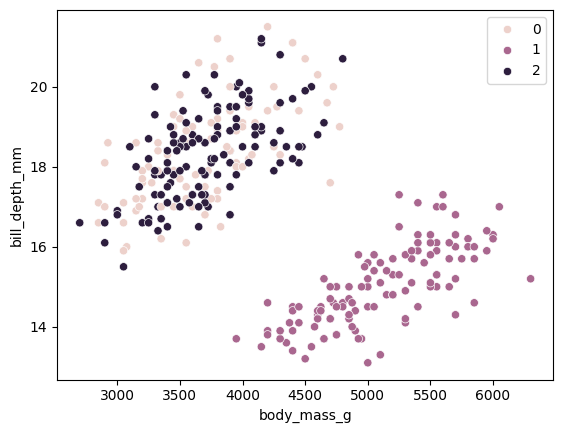

In [32]:
sns.scatterplot(x=X['body_mass_g'], y=X['bill_depth_mm'], hue=labels)

Then we plot bill length vs. bill depth (separated by labels).

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

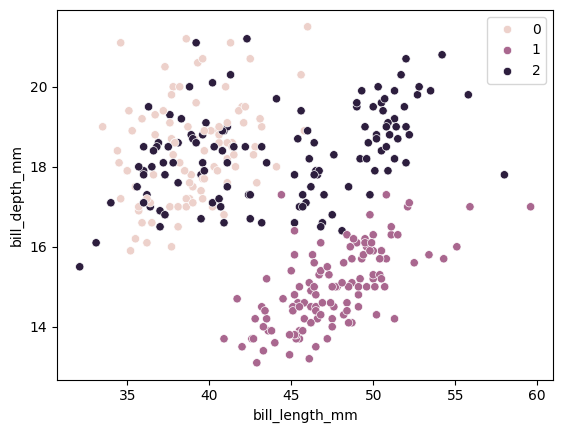

In [33]:
sns.scatterplot(x=X['bill_length_mm'], y=X['bill_depth_mm'], hue=labels)

Lastly, we plot bill length  vs. body mass (separated by labels).

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

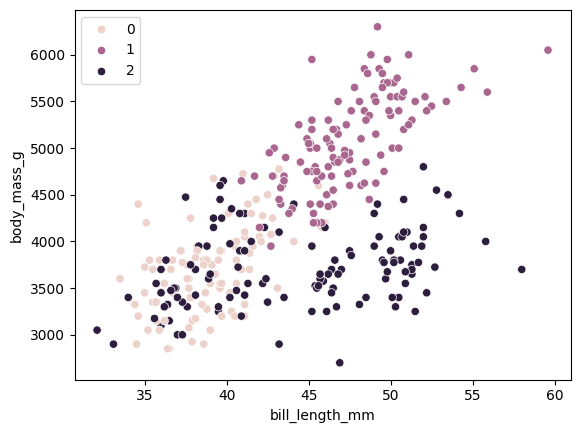

In [34]:
sns.scatterplot(x=X['bill_length_mm'], y=X['body_mass_g'], hue=labels)

Now that looks quite a bit better! Let's check the cross tabulation matrix!

To begin, we create a `DataFrame` with labels (prediction) and species (ground truth) side by side.

In [35]:
check_df = pd.DataFrame({'prediction': labels, 'ground_truth': y})
check_df

,prediction,ground_truth
0,0,Adelie
1,0,Adelie
2,0,Adelie
4,0,Adelie
5,0,Adelie
...,...,...
338,1,Gentoo
340,1,Gentoo
341,1,Gentoo
342,1,Gentoo


Then we use `pandas`'s crosstab to calculate our cross tabulation.

In [36]:
crosstab = pd.crosstab(check_df['prediction'], check_df['ground_truth'])
crosstab

ground_truth,Adelie,Chinstrap,Gentoo
prediction,,,
0,91,0,0
1,0,0,119
2,55,68,0


The table shows that we are able to perfectly construct a cluster for one kind of Species (Gentoo). However, the other two aren't properly clustered.

We might need to check out another method to have more success!

## A different clustering algorithm

Have a look at scikit learn's documentation for Agglomerative Clustering (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html and https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering). This is a special kind of hierarchical clustering method which can work well for datasets like our penguins.

Oversimplified, the algorithm creates clusters by 'clumping' together neighboring individuals. Depending on the specific 'linkage', it has different rules on how to do so. See https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html for a visual explanation on how it works.

As before, we need to import it in order to use it.

In [37]:
from sklearn.cluster import AgglomerativeClustering

In [38]:
AgglomerativeClustering?

Init signature:
AgglomerativeClustering(
    n_clusters=2,
    *,
    metric='euclidean',
    memory=None,
    connectivity=None,
    compute_full_tree='auto',
    linkage='ward',
    distance_threshold=None,
    compute_distances=False,
)
Docstring:     
Agglomerative Clustering.

Recursively merges pair of clusters of sample data; uses linkage distance.

Read more in the :ref:`User Guide <hierarchical_clustering>`.

Parameters
----------
n_clusters : int or None, default=2
    The number of clusters to find. It must be ``None`` if
    ``distance_threshold`` is not ``None``.

metric : str or callable, default="euclidean"
    Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
    "manhattan", "cosine", or "precomputed". If linkage is "ward", only
    "euclidean" is accepted. If "precomputed", a distance matrix is needed
    as input for the fit method.

    .. versionadded:: 1.2

    .. deprecated:: 1.4
       `metric=None` is deprecated in 1.4 and will be removed in 1

---
### &#x270d; Exercise 

Train a model based on Agglomerative Clustering!
- Again, choose 3 clusters (as before).
- Look at the documentation and choose a `linkage` property. (Hint: The different strategies are illustrated following the links above.)
- Create a StandardScaler and combine it with the Agglomerative Clustering model in a new pipeline.
- Fit your model.
- Predict the labels (species).

You'll find the crosstab at the end to evaluate your results. You should be able to achieve a next-to-perfect prediction!

In [39]:
# YOUR CODE HERE
acmodel = AgglomerativeClustering(n_clusters=3, linkage='complete')

In [40]:
scaler = StandardScaler()
pipeline = make_pipeline(scaler, acmodel)

In [41]:
pipeline.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('agglomerativeclustering',
                 AgglomerativeClustering(linkage='complete', n_clusters=3))])

In [42]:
labels = pipeline.fit_predict(X)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

---

Below, you can check your results:

In [43]:
check_df = pd.DataFrame({'prediction': labels, 'ground_truth': y})
check_df

,prediction,ground_truth
0,0,Adelie
1,0,Adelie
2,0,Adelie
4,0,Adelie
5,0,Adelie
...,...,...
338,1,Gentoo
340,1,Gentoo
341,1,Gentoo
342,1,Gentoo


In [44]:
crosstab = pd.crosstab(check_df['prediction'], check_df['ground_truth'])
crosstab

ground_truth,Adelie,Chinstrap,Gentoo
prediction,,,
0,145,0,0
1,0,0,119
2,1,68,0


*Note:* In real world scenarios you're usually not able to get a result which is even close to perfect. We were just really lucky to find a clustering algorithm which performs so well. To prove that point, replace the 'complete' linkage with a 'ward' linkage which (according to the documentation) could have performed equally well. Then run the above commands again. (You should then see that Adelie is a lot worse whereas Chinstrap and Gentoo are still perfect.)

## Visually compare ground truth and clustering

Let's create pairplots for both our ground truth and our clustering result for a quick visual comparison.
Do you still remember how to create these plots?

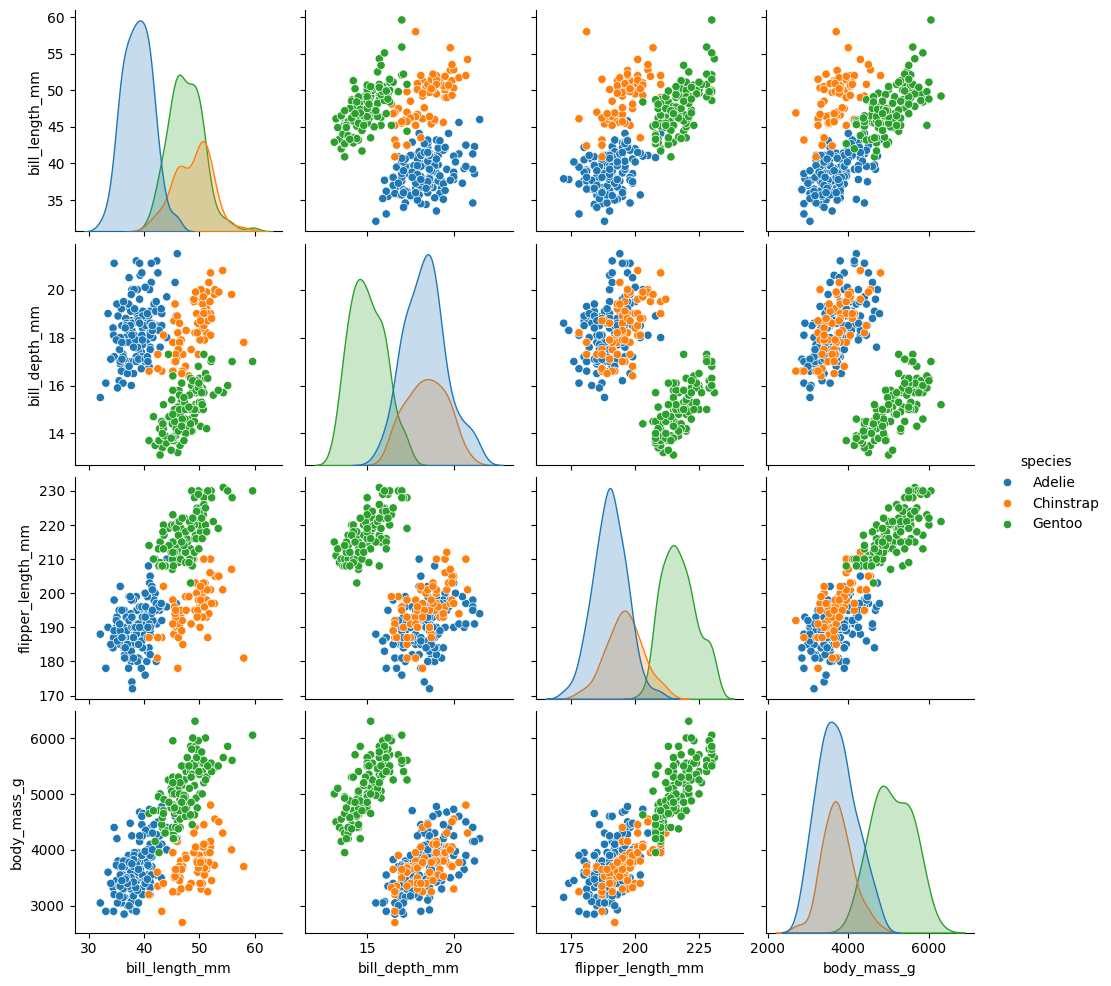

In [45]:
sns.pairplot(data=penguins, hue='species')

Create a copy of our penguins dataset and replace the 'species'-column with our labels. Note: We can't use X because X has a one hot encoding of our data!

In [46]:
penguins_new = penguins.copy()
penguins_new['species'] = labels

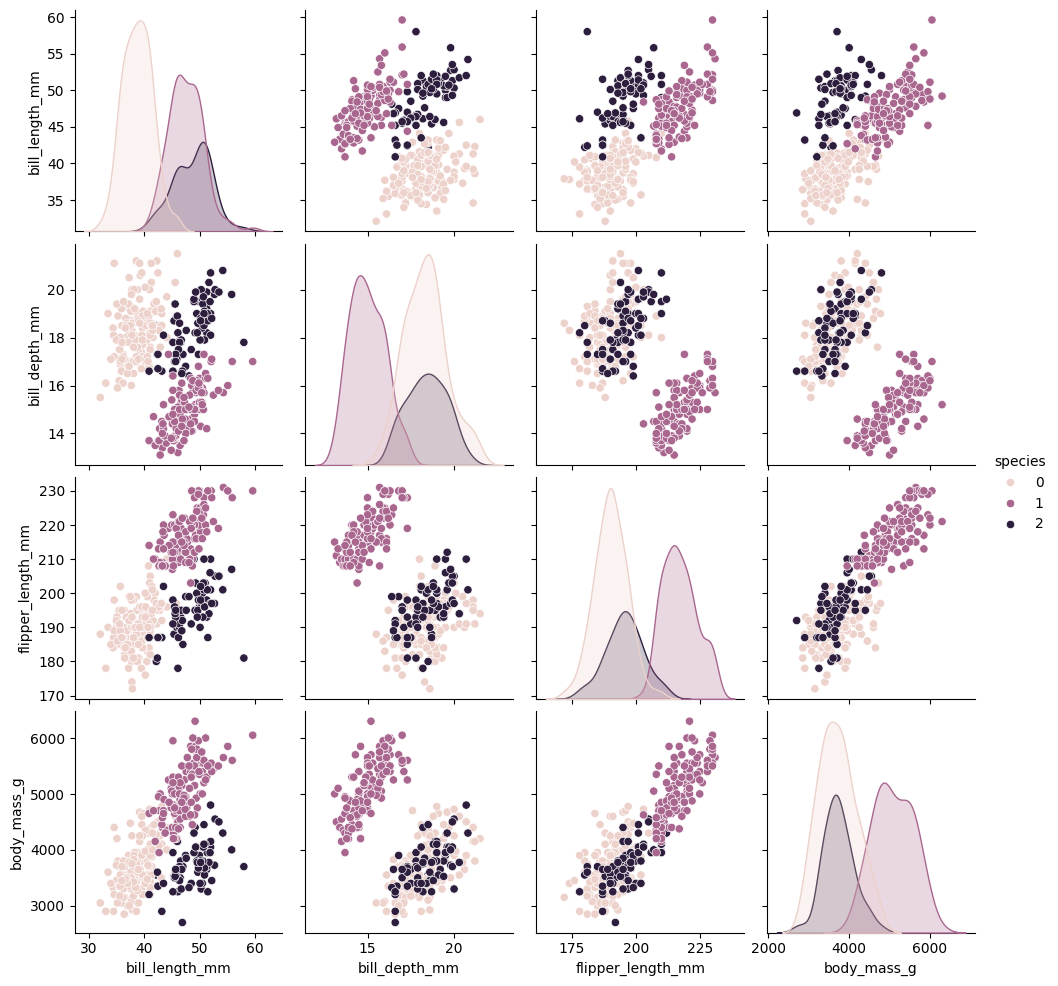

In [47]:
sns.pairplot(data=penguins_new, hue='species')

## Summary

We have successfully clustered our unlabelled dataset of penguins. Have a look at the two pair plots above. Colors aside, our plots look basically the same!

**Remember:** For real world applications, clustering usually is a very difficult task. Often, you don't even know how many clusters to expect. Furthermore, you often get results which you cannot test -- because you don't have data containing ground truth. That means that you need a lof of effort, experiments and new data to verify your clustering.



## Bonus: Elbow method

The elbow method is a heuristic that seeks to indicate the 'best' number of clusters.

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

In [49]:
# We'll redo our initial operations to start with a clean slate
penguins = sns.load_dataset('penguins')
penguins.dropna(inplace=True)
X = penguins.drop('species', axis=1)
X = pd.get_dummies(X)
y = penguins['species']
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,True,False,False,True,False
340,46.8,14.3,215.0,4850.0,True,False,False,True,False
341,50.4,15.7,222.0,5750.0,True,False,False,False,True
342,45.2,14.8,212.0,5200.0,True,False,False,True,False


The heuristic iterates through different number of clusters and plots the associated value for measuring the model's performance.

Here, we use the `inertia` value, which is the sum of squared distances of samples to their closest cluster center. The better the model, the smaller this value as clusters are somewhat more tightly packed.

<Axes: >

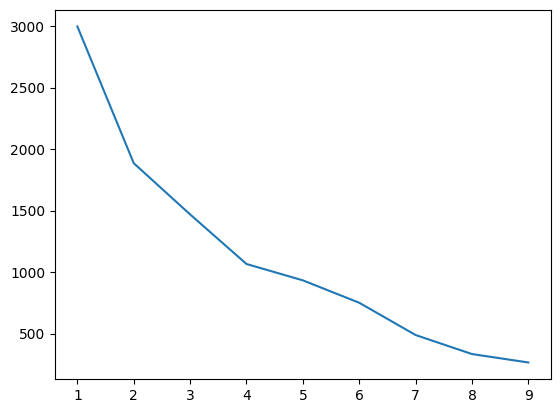

In [50]:
n_clusters = range(1,10)
scores = []
for n in n_clusters:
    model = make_pipeline(StandardScaler(), KMeans(n_clusters=n))
    model.fit_predict(X)
    scores.append(model[1].inertia_)

sns.lineplot(x=n_clusters, y=scores)

The elbow method assumes that first, increasing the number of clusters will have a major impact on the model's performance, but this effect diminuishes and clusters become too small. The number of clusters that fits the data best is assumed to be the one where this turn, i.e., the 'elbow' of the curve, is particularly sharp.

Note: This is only a heuristic! It gives you an indication, but can do nothing more!